# Business understanding
This project uses a publicly available dataset from Kaggle, [found here](https://www.kaggle.com/datasets/sujithmandala/marketing-campaign-positive-response-prediction?resource=download), to predict if a customer will respond to a marketing campaign. The dataset includes a few demographic, socioeconomic, and financial attributes that describe customer characteristics. By leveraging these features, a classification model can be developed to estimate the likelihood of customer engagement with a marketing outreach.

From a business perspective, accurately predicting customer response enables more effective targeting of marketing communications. Instead of applying uniform strategies across all customers, the company can focus resources on individuals who are more likely to respond, while tailoring messaging and delivery methods to specific customer segments. This approach has the potential to increase response rates, reduce marketing costs, and improve overall campaign efficiency. Ultimately, the insights gained from this model can support data-driven decision-making in customer relationship management and digital marketing strategy.

## Import statements and initializing the dataframe

In [9]:
import pandas as pd
df = pd.read_csv("./data/campaign_responses.csv")

# Data understanding
The responded column is the target variable for the classification task. It's binary and nominal, as it represents two unordered categories with no inherent magnitude or ranking. Gender, employed, and marital status are also nominal binary attributes for the same reason. 

Age, number of children, and annual income are ratio data because they are continuous and all have a meaningful zero point.

Credit score is interval because it is continuous but it doesn't have a meaningful zero point.

In [10]:
print(f"rows: {df.shape[0]}")
print(f"columns: {df.shape[1]}")
print("\n")


for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print()


# df[(df['marital_status'] == 'Single') & (df['responded'] == 'yes')]
df[(df['marital_status'] == 'Single')]

rows: 56
columns: 9


customer_id: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56]

age: [35 28 42 31 47 25 39 33 51 27 44 30 36 29 49 26 41 32 37 34 43 38 45 40
 46 48]

gender: ['Male' 'Female']

annual_income: [ 65000  45000  85000  55000  95000  38000  72000  48000 110000  40000
  90000  52000  75000 105000  36000  54000  80000  60000  92000  42000
  78000  98000  62000 100000  44000  56000  82000  50000  35000  88000
  58000  43000  46000  64000 102000]

credit_score: [720 680 750 710 790 630 740 670 820 620 780 690 730 660 800 610 760 700
 770 640 650 810 600]

employed: ['Yes' 'No']

marital_status: ['Married' 'Single']

no_of_children: [2 0 3 1]

responded: ['Yes' 'No']



,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
1,2,28,Female,45000,680,No,Single,0,No
3,4,31,Female,55000,710,Yes,Single,1,No
5,6,25,Female,38000,630,No,Single,0,No
7,8,33,Female,48000,670,Yes,Single,0,No
9,10,27,Female,40000,620,No,Single,0,No
11,12,30,Female,52000,690,Yes,Single,0,No
13,14,29,Female,45000,660,No,Single,0,No
15,16,26,Female,36000,610,No,Single,0,No
17,18,32,Female,54000,700,Yes,Single,0,No
19,20,34,Female,60000,720,Yes,Single,1,No


# Data preparation
#### Data cleaning

In [11]:
print(f"Duplicates: {df.duplicated().sum()}")
print("There are no spelling issues, every column uses the same units for every row, ")
print(f"Null values: {df.isna().any().any()}")
print("There are so few columns and rows that I don't want to remove any data points")

Duplicates: 0
There are no spelling issues, every column uses the same units for every row, 
Null values: False
There are so few columns and rows that I don't want to remove any data points


# Modeling
- Drop columns that aren't useful like customer_id and the target column
- Split the data between training and testing before encoding and scaling to prevent **data leakage**

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(["customer_id", "responded"], axis=1)
y = df["responded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Data preparation
#### Preprocessing 
- Encode categorical features
- Scale continuous features in training only

In [13]:
X_train = pd.get_dummies(X_train, columns=["marital_status", "gender", "employed"], drop_first=True)
X_test = pd.get_dummies(X_test, columns=["marital_status", "gender", "employed"], drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ["age", "annual_income", "credit_score", "no_of_children"]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Modeling
Using the Decision Tree model to get the prediction

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluation

Showing the results with a confusion matrix

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)


confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, pos_label="Yes")}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label="Yes")}")
print(f"F1 Score: {f1_score(y_test, y_pred, pos_label="Yes")}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Visualization

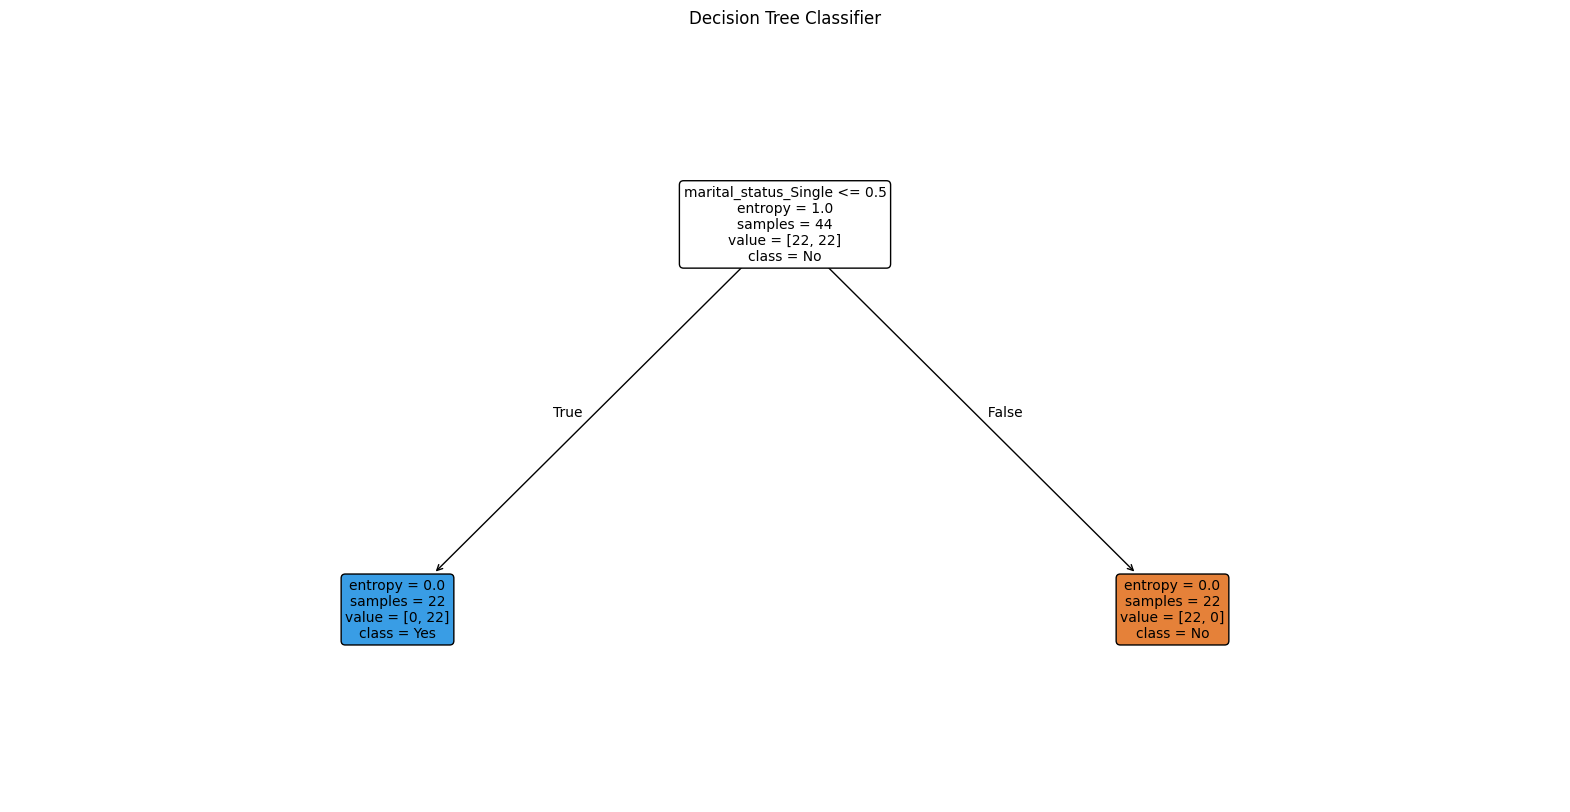

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    classifier,
    feature_names=X_train.columns,  # if X_train is a DataFrame
    class_names=["No", "Yes"],       # adjust to your labels
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier")
plt.show()


# Deployment

Based on the algorithm, marital status is the only thing that matters to determine if the email recepient will respond. The company should only send emails to married people from now on. All other attributes are irrelevant because marital status is clearly the most important data point to track. \s

Clearly more than 55 users should be taken into account. Also, research should be done into how this data was collected. There could be errors in data collection leading to such a decisive split.